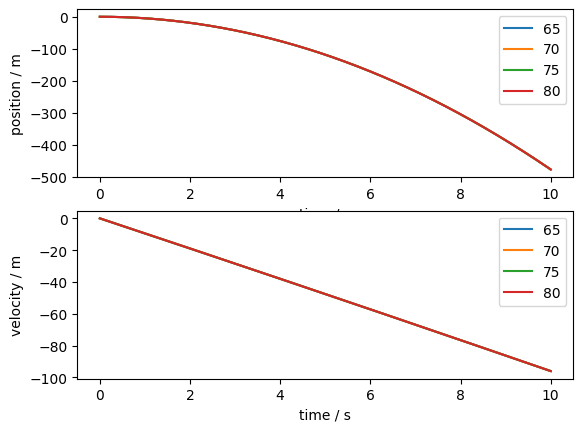

In [5]:
#import libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Constants
g = 9.81
pi = np.pi
#Equation of motion

# z = [x, dx]



def EqM(t, z):
    dz = [z[1],
          ((t_stall*z[1])/(omega_free*lead)+t_stall)/
          (m*(d_l/2*(lead*np.cos(thet_rad)+mu_lead*pi)/(pi*d_l*np.cos(thet_rad)+d_c*mu_collar/2))) - g*np.cos(thet_rad)]
    return dz



#Define parameters 
#leadscrew
lead = 0.004 # lead / meters
thet_deg = 15 # helix angle/ degerees
thet_rad = thet_deg * (np.pi / 180) # helix angle/ rad
mu_lead = 0.15 # friction on leadscrew
mu_collar = 0.15 # friction on collar
d_l = 0.05 # leadscrew diameter / m
d_c = 0 # collar diamter / m
alpha_rad = np.arctan(lead / (np.pi * d_l)) # pitch angle/ rad

#motor - GPG-M (D.C. brushless motor)
t_stall = 3.5 # stall torque / Nm
omega_free = 3200 # no load speed / rpm
omega_free_rad = (omega_free / 60) * 2 * np.pi
G_r = [65, 70, 75, 80] # gear ratios
motor_grad = - t_stall / omega_free

#system
m = 1000 # load to lift / kg
load = m * g # load to lift / N

#Leadscrew constants
##Add them later, not sure if we actually need them

#Solver params
T = 10 # time to run for / s
rtol = 1e-6 # simulation precision
IC = [0, 0] # initial conditions [position, velocity]

t_out = []
z_out = []

#Solver
for i in range(len(G_r)):
    vr = G_r [i]

    sol = solve_ivp(EqM, (0,T), IC, rtol = rtol, max_step = 1e-2)

    t = sol.t
    z = sol.y

    t_out.append(t) # time array
    z_out.append(z) # data array [position, velocity]

#Plots
fig, ax1, = plt.subplots(2)

# position 
for i in range(len(t_out)):
    ax1[0].plot(t_out[i], z_out[i][0,:], label=str(G_r[i]))
ax1[0].set_xlabel("time / s")
ax1[0].set_ylabel("position / m")
ax1[0].legend()

# velocity 
for i in range(len(t_out)):
    ax1[1].plot(t_out[i], z_out[i][1,:], label=str(G_r[i]))
ax1[1].set_xlabel("time / s")
ax1[1].set_ylabel("velocity / m")
ax1[1].legend()

plt.show()

